In [1]:
import os
import tensorflow as tf
from util import constants
from util.config_util import get_model_params, get_task_params, get_train_params
from tf2_models.trainer import Trainer
from absl import app
from absl import flags
import numpy as np
from util.models import MODELS
from util.tasks import TASKS
from notebook_utils import *
from distill.repsim_util import *

%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()

from tqdm import tqdm

chkpt_dir='../tf_ckpts'

[nltk_data] Downloading package punkt to /home/dehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_outputs(model, x):
  outputs = model.detailed_call(x, training=tf.convert_to_tensor(True))
  logits, reps = outputs[0], outputs[model.rep_index]
  if model.rep_layer is not None and model.rep_layer is not -1:
    reps = reps[model.rep_layer]

  return reps, logits

In [3]:
task1 = 'svhn'
task1 = TASKS[task1](get_task_params(), data_dir='../data')
cl_token = 0

task = task1

models = []
labels = []

In [4]:
config={'student_exp_name':'gc_stdr1',
    'teacher_exp_name':'gc_o_dtch1',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_2',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff_r0, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt_r0, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr1_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr1
No checkpoint found ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr1_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr1
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
No checkpoint found ../tf_ckpts/svhn/resnet_h-

In [5]:
config={'student_exp_name':'gc_stdr2',
    'teacher_exp_name':'gc_o_dtchrr2',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_2',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff_r1, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt_r1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr2_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr2
No checkpoint found ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr2_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr2
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
No checkpoint found ../tf_ckpts/svhn/resnet_h-

In [6]:
config={'student_exp_name':'gc_stdr3',
    'teacher_exp_name':'gc_o_dtchrr3',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_2',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff_r2, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt_r2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr3
No checkpoint found ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchrr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_stdr3
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
No checkpoint found ../tf_ckpts/svhn/resnet_h-

In [7]:
config={'student_exp_name':'gc_std45',
    'teacher_exp_name':'gc_o_dtchr3',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_2',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff1, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std45
Restored student from ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std45/ckpt-315
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
Restored student from ../tf_ckpts/svh

In [8]:
config={'student_exp_name':'gc_std55',
    'teacher_exp_name':'gc_o_dtchr3',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_2',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff2, _ = get_student_model(config, task, std_hparams, cl_token)

# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
# tchr_hparams.output_attentions = True
# tchr_hparams.output_embeddings = True
# tchr_hparams.output_hidden_states = True

# tchr_rsnt2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std55
Restored student from ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_2_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std55/ckpt-300


In [9]:
config={'student_exp_name':'gc_std56',
    'teacher_exp_name':'gc_o_dtchr3',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'offline',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff3, _ = get_student_model(config, task, std_hparams, cl_token)

# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
# tchr_hparams.output_attentions = True
# tchr_hparams.output_embeddings = True
# tchr_hparams.output_hidden_states = True

# tchr_rsnt2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std56
Restored student from ../tf_ckpts/svhn/offline_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr3_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std56/ckpt-300


In [10]:
config={'student_exp_name':'gc_std61',
    'teacher_exp_name':'gc_o_dtchr61',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff4, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr61_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std61
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr61_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std61/ckpt-300
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
Restored student from ../tf_ckpts/svh

In [11]:
config={'student_exp_name':'gc_std62',
    'teacher_exp_name':'gc_o_dtchr62',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff5, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt5, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr62_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std62
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr62_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std62/ckpt-300
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
Restored student from ../tf_ckpts/svh

In [12]:
config={'student_exp_name':'gc_std63',
    'teacher_exp_name':'gc_o_dtchr63',
    'teacher_config':'rsnt_svhn1',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'resnet',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff6, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_rsnt6, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr63_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std63
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_resnet_h-512_rd-2_hdrop-0.2_indrop-0.0_rsnt_svhn1_gc_o_dtchr63_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std63/ckpt-300
model config: rsnt_svhn1
{'hidden_dim': 512, 'pool_size': 3, 'filters': [32, 32, 32, 32], 'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3)], 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0, 'num_res_net_blocks': 2}
Restored student from ../tf_ckpts/svh

In [13]:
config={'student_exp_name':'gc_std64',
    'teacher_exp_name':'gc_o_dtchr64',
    'teacher_config':'ff_svhn2',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'cl_vff',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff7, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_ff7, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr64_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std64
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr64_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std64/ckpt-300
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
Restored student from ../tf_ckpts/svhn/cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr64/ckpt-300


In [14]:
config={'student_exp_name':'gc_std65',
    'teacher_exp_name':'gc_o_dtchr65',
    'teacher_config':'ff_svhn2',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'cl_vff',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff8, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_ff8, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr65_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std65
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr65_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std65/ckpt-300
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
Restored student from ../tf_ckpts/svhn/cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr65/ckpt-300


In [15]:
config={'student_exp_name':'gc_std66',
    'teacher_exp_name':'gc_o_dtchr66',
    'teacher_config':'ff_svhn2',
    'task_name':'svhn',
    'student_model':'cl_vff',
    'teacher_model':'cl_vff',
    'student_config':'ff_svhn2',
    'distill_config':'pure_dstl5_4_crs_slw_3',
    'distill_mode':'online',
    'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
std_hparams.output_attentions = True
std_hparams.output_embeddings = True

std_ff9, _ = get_student_model(config, task, std_hparams, cl_token)

tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])
tchr_hparams.output_attentions = True
tchr_hparams.output_embeddings = True
tchr_hparams.output_hidden_states = True

tchr_ff9, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
student_checkpoint: ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr66_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std66
Restored student from ../tf_ckpts/svhn/online_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr66_student_cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_std66/ckpt-300
model config: ff_svhn2
{'hidden_dim': 512, 'depth': 3, 'hidden_dropout_rate': 0.2, 'input_dropout_rate': 0.0}
Restored student from ../tf_ckpts/svhn/cl_vff_h-512_d-3_hdrop-0.2_indrop-0.0_ff_svhn2_gc_o_dtchr66/ckpt-300


In [16]:
models = [std_ff_r0, std_ff_r1, std_ff_r2, std_ff9, std_ff8, std_ff7, std_ff4, std_ff5, std_ff6, std_ff1, std_ff2, std_ff3,
          tchr_rsnt_r0, tchr_rsnt_r1, tchr_rsnt_r2, tchr_ff9, tchr_ff8, tchr_ff7, tchr_rsnt4, tchr_rsnt5, tchr_rsnt6, tchr_rsnt1]
labels = ['std_f_r0', 'std_ff_r1', 'std_ff_r2', 'std_ff9', 'std_ff8', 'std_ff7', 'std_ff4', 'std_ff5', 'std_ff6', 'std_ff1', 'std_ff2', 'std_ff3', 
          'tchr_ff_r0', 'tchr_rsnt_r1', 'tchr_rsnt_r2', 'tchr_ff9', 'tchr_ff8', 'tchr_ff7', 'tchr_rsnt4', 'tchr_rsnt5', 'tchr_rsnt6', 'tchr_rsnt1']

for x, y in task.valid_dataset:
    for model in models:
        model(x)
    break

In [17]:

def  get_reploss_dic(models, labels, task, repindex=1):    
    reploss_dic = {}
    for l1 in labels:
        reploss_dic[l1] = {}
        for l2 in labels:
            reploss_dic[l1][l2] = []

    num_batches = 0
    for x, y in task.valid_dataset:
        reps = []
        for m in models:
            outputs = get_outputs(m, x)
            reps.append(outputs[repindex])
        for i in np.arange(len(labels)):
            for j in np.arange(i, len(labels)):
                reploss = rep_loss(reps1=reps[i], reps2=reps[j],
                                     padding_symbol=None,
                                     inputs=x)
                reploss_dic[labels[i]][labels[j]].append(reploss)
                if i != j:
                    reploss_dic[labels[j]][labels[i]].append(reploss)
        num_batches += 1

        if num_batches > 20:
            break
            
    dist_lists = {}
    for l1 in reploss_dic.keys():
        dist_lists[l1] = []
        for i in  np.arange(len(reploss_dic[l1].keys())):
            l2 = list(reploss_dic[l1].keys())[i]
            dist_lists[l1].append(np.mean(reploss_dic[l1][l2]))
            
    return reploss_dic, dist_lists

In [18]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, task, repindex=1)

In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

def project2d(reploss_dic, dist_lists):
    dists = []
    cities = []
    for i in np.arange(len(dist_lists.keys())):
        k = list(dist_lists.keys())[i]
        cities.append(k)
        dists.append(list(map(float , dist_lists[k])))

    adist = np.array(dists)
    amax = np.amax(adist)
    adist /= amax

    mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
    results = mds.fit(adist)

    coords = results.embedding_

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        coords[:, 0], coords[:, 1], marker = 'o'
        )
    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    plt.show()

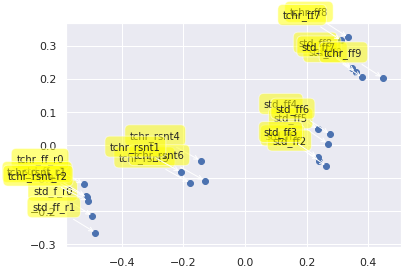

In [20]:
project2d(reploss_dic, dist_lists)

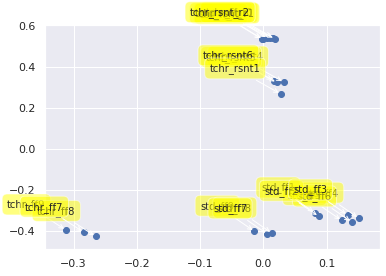

In [21]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, task, repindex=0)
project2d(reploss_dic, dist_lists)